In [29]:
%run ../scripts/lab3_analysis_functions.py

In [4]:
print('Calibration Starting...')

Calibration Starting...


In [5]:
filename = './data/am1.h5'
hf = tables.open_file(filename, "r")
# raw_data_1 = import_data(filename)
event_data_am1= hf.root.EventData.read()
hf.close()

filename = './data/am2.h5'
hf = tables.open_file(filename, "r")
# raw_data_2 = import_data(filename)
event_data_am2= hf.root.EventData.read()
hf.close()

#filename = '../data/cs1.h5'
#hf = tables.open_file(filename, "r")
# raw_data_1 = import_data(filename)
#event_data_cs1= hf.root.EventData.read()
#hf.close()

#filename = '../data/cs2.h5'
#hf = tables.open_file(filename, "r")
# raw_data_2 = import_data(filename)
#event_data_cs2= hf.root.EventData.read()
#hf.close()

In [7]:
filename = './data/longCs.h5'
hf = tables.open_file(filename, "r")
# raw_data_2 = import_data(filename)
event_data_cs3= hf.root.EventData.read()
hf.close()
filename = './data/longCs2.h5'
hf = tables.open_file(filename, "r")
# raw_data_2 = import_data(filename)
event_data_cs4= hf.root.EventData.read()
hf.close()

In [86]:
event_data_am = np.concatenate((event_data_am1, event_data_am2))
event_data_cs = np.concatenate((event_data_cs3,event_data_cs4 ))

In [80]:
#event_data_cs = event_data_cs3

In [87]:
nrgs_am = event_data_am['ADC_value']
nrgs_cs = event_data_cs['ADC_value']
channel_am = event_data_am['detector']
channel_cs = event_data_cs['detector']
energies = np.concatenate((nrgs_am, nrgs_cs))
channels = np.concatenate((channel_am, channel_cs))

all_counts, bin_edges = np.histogram(channels, bins=200, range = [0, 200])
all_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.cla()
plt.clf()
plt.semilogy(all_bins, all_counts, 'b')
plt.savefig('./figures/calibration-channels.pdf')

In [100]:
slopes = []
intercepts = []
am_fwhm = []
cs_fwhm =[]
channels_fwhm = []
cs_err = []
am_err = []
#am range = [5.5e4, 6.5e4]
#cs range = [6.2e5, 7.2e5]

am_energy = 59.54
cs_energy = 661.7

empty_channels = 0
        
for i in range(0,152, 1):
    #print('======')
    #print(i)
    mask_am = (event_data_am['detector'] == i)
    mask_cs = (event_data_cs['detector'] == i)
    data_am = event_data_am[mask_am]
    #print('am')
    #print(len(data_am))
    data_cs = event_data_cs[mask_cs]
    #print('cs')
    #print(len(data_cs))
    
    channels_am = (data_am['detector'])
    nrgs_am = (data_am['ADC_value'])
    channels_cs = (data_cs['detector'])
    nrgs_cs = (data_cs['ADC_value'])
    
    channels_fwhm.append(i)

    if len(nrgs_cs) < 50:
        #print(i, ': empty')
        slopes.append(0)
        intercepts.append(0)
        empty_channels += 1
        am_fwhm.append(0)
        cs_fwhm.append(0)
        am_err.append(0)
        cs_err.append(0)
        #channels_fwhm.append(i)
    elif i == 67 or i ==75 or i ==77 or i == 36 or i ==38 or i ==39 or i== 40 or i == 90 or i ==69 or i == 114:        #(i, ': empty')
        slopes.append(0)
        intercepts.append(0)
        empty_channels += 1
        am_fwhm.append(0)
        cs_fwhm.append(0)
        am_err.append(0)
        cs_err.append(0)
        #channels_fwhm.append(i)
    else:
        am_counts, bin_edges = np.histogram(nrgs_am, bins=256, range = [5.7e4, 6.6e4])
        am_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
        if i == 14 or i ==15 or i ==16 or i ==24:
            am_counts, bin_edges = np.histogram(nrgs_am, bins=256, range = [5.5e4, 6.6e4])
            am_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
        elif i ==19:
            am_counts, bin_edges = np.histogram(nrgs_am, bins=100, range = [5.8e4, 6.5e4])
            am_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
        elif i ==111:
            am_counts, bin_edges = np.histogram(nrgs_am, bins=100, range = [5.8e4, 6.55e4])
            am_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
                
        odd_channels = [14, 24, 36, 39, 40, 42, 55, 62, 65, 69, 80, 90, 124, 128, 19, 25, 28, 31, 34, 45, 53, 78, 121, 129, 136, 137]

        if i in odd_channels:
            cs_counts, bin_edges = np.histogram(nrgs_cs, bins=256, range = [5.0e5, 7.2e5])
            cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges   
        else:
            cs_counts, bin_edges = np.histogram(nrgs_cs, bins=256, range = [6.6e5, 7.2e5])
            cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
        if i == 24: # this channel has weird wide peak with high count channel right at edge and wasn't being fit properly
            cs_counts, bin_edges = np.histogram(nrgs_cs, bins=256, range = [6.0e5, 6.8e5])
            cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
        if i == 68 or i == 62 or i == 53 or i ==69 or i ==78 or i ==80 or i ==124 or i ==9: # this channel has weird wide peak with high count channel right at edge and wasn't being fit properly
            cs_counts, bin_edges = np.histogram(nrgs_cs, bins=256, range = [6.0e5, 7.0e5])
            cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
        if i == 69 or i == 90: # this channel has weird wide peak with high count channel right at edge and wasn't being fit properly
            cs_counts, bin_edges = np.histogram(nrgs_cs, bins=256, range = [6.4e5, 6.6e5])
            cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
        #if i == 19: # this channel has weird wide peak with high count channel right at edge and wasn't being fit properly
        #    cs_counts, bin_edges = np.histogram(nrgs_cs, bins=256, range = [6.5e5, 8.0e5])
        #    cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
        #if i == 36 or i ==38 or i ==39 or i== 40: # this channel has weird wide peak with high count channel right at edge and wasn't being fit properly
        #    fwhm, cs_centroid, err, amp = fit_gaussian_peak_linear_background_wide(cs_bins, cs_counts)
        else:
            fwhm, cs_centroid, err, amp = fit_gaussian_peak_linear_background(cs_bins, cs_counts, plot=False)
        
        fwhm, am_centroid, err, amp = fit_gaussian_peak_linear_background(am_bins, am_counts, plot=False)

        calibration_channels = [am_centroid, cs_centroid]
        calibration_energies = [am_energy, cs_energy]
        coefficients = calculate_coefficients(calibration_channels, calibration_energies, 1)
        if len(coefficients) == 2:
            slope = coefficients[0]
            intercept = coefficients[1]
        else:
            print "check polynomial order" 

        slopes.append(slope)
        intercepts.append(intercept)
        
        energies = np.concatenate((nrgs_am, nrgs_cs))
        energies_kev = calculate_energies(energies, slope, intercept)
        #print(energies_kev)
        
        counts, bin_edges = np.histogram(energies_kev, bins=2048, range = [40, 700])
        bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
        
        fwhm, am_centroid, err,amp = fit_gaussian_peak_linear_background(bins[40:80], counts[40:80], plot=False)
        #if i ==9:
        #    fwhm, am_centroid, err,amp = fit_gaussian_peak_linear_background(bins[40:90], counts[40:90], plot=True)
        am_fwhm.append(fwhm)
        #print(amp)
        err = err #+ np.sqrt(amp)
        am_err.append(err)

        #fwhm, cs_centroid, err= fit_gaussian_with_plot(bins[1850:2000], counts[1850:2000])
        fwhm, cs_centroid, err,amp = fit_gaussian_peak_linear_background(bins[1850:2000], counts[1850:2000], plot=False)

        cs_fwhm.append(fwhm)
        #print(amp)
        err = err #+ np.sqrt(amp)
        cs_err.append(err)
        
        #if fwhm > 10:
        #
        #    fwhm, cs_centroid, err,amp = fit_gaussian_peak_linear_background(bins[1850:2000], counts[1850:2000], plot=True)

        #    plt.figure(4, figsize=(7, 5))
        #    plt.cla()
        #    plt.clf()
        #    plt.xlim([650, 680])
        #    plt.axvline(59.54, color='r')
        #    plt.axvline(661.7, color='r')
        #    plt.axvline(am_centroid, color='b')
        #    plt.axvline(cs_centroid, color='b')
        #    plt.plot(bins, counts, 'k-')
        #    plt.xlabel('Energy (keV)')
        #    plt.ylabel('Counts')
        #    plt.title("Calibrated Spectrum " + str(i))
        #    plt.legend(loc='upper right')
        #    plt.tight_layout()
       ## plt.savefig("./figures/CalibratedSpectrum.pdf")
        #    plt.show()
        
        #plt.figure(4, figsize=(7, 5))
        #plt.cla()
        #plt.clf()
        #plt.xlim([50, 70])
        #plt.axvline(59.54, color='r')
        #plt.axvline(661.7, color='r')
        #plt.axvline(am_centroid, color='b')
        #plt.axvline(cs_centroid, color='b')
        #plt.plot(bins, counts, 'k-')
        #plt.xlabel('Energy (keV)')
        #.ylabel('Counts')
        #plt.title("Calibrated Spectrum " + str(i))
        #plt.legend(loc='upper right')
        #plt.tight_layout()
       # plt.savefig("./figures/CalibratedSpectrum.pdf")
        #plt.show()
        
        #plt.figure(4, figsize=(7, 5))
        #plt.cla()
        #plt.clf()
        #plt.xlim([50, 700])
        #plt.axvline(59.54, color='r')
        #plt.axvline(661.7, color='r')
        #plt.axvline(am_centroid, color='b')
        #plt.axvline(cs_centroid, color='b')
        #plt.plot(bins, counts, 'k-')
        #plt.xlabel('Energy (keV)')
        #plt.ylabel('Counts')
        #plt.title("Calibrated Spectrum " + str(i))
        #plt.legend(loc='upper right')
        #plt.tight_layout()
       # plt.savefig("./figures/CalibratedSpectrum.pdf")
        #plt.show()
        
        #print('fwhm ', am_fwhm, cs_fwhm)
        
        #time.sleep(4)
    
f = open('./data/calibration.txt','w')
for i in range(0, len(slopes), 1):
    f.write(str(slopes[i]) + ' ' + str(intercepts[i]) + '\n')
    
f.close()

print('channels not calibrated (out of 152) = ', empty_channels)

('channels not calibrated (out of 152) = ', 29)


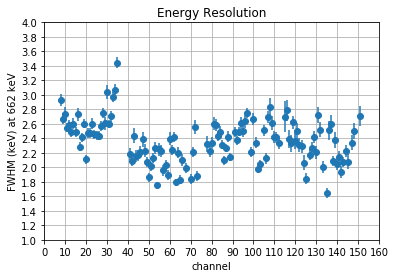

In [117]:
plt.cla()
plt.clf()
plt.ylim([1.0,4.0])
plt.xlim([0,160])
plt.xticks(np.linspace(0,160,17))
plt.yticks(np.linspace(1,4,16))
plt.errorbar(channels_fwhm, cs_fwhm, yerr=cs_err, fmt='o')
#plt.plot(channels_fwhm, cs_fwhm, 'o')
plt.title('Energy Resolution')
plt.ylabel('FWHM (keV) at 662 keV')
plt.xlabel('channel')
plt.grid(True, which='both')
#plt.xlim([30,50])
plt.savefig('./figures/energy_res.pdf')
plt.show()

In [90]:
cs_fwhm_clean = []
np.mean(cs_fwhm)
for i in cs_fwhm:
    if i > 0.5 and i < 6:
        cs_fwhm_clean.append(i)
print('average fwhm for  (0.5 - 6 keV) channels: ' , round(np.mean(cs_fwhm_clean),2))
print('standard deviation: ' , round(np.std(cs_fwhm_clean),2))

('average fwhm for  (0.5 - 6 keV) channels: ', 2.39)
('standard deviation: ', 0.39)


In [91]:
print('Calibration Complete!')
print('check ./figures/energy_res.pdf for results')

Calibration Complete!
check ../figures/energy_res.pdf for results
